In [2]:
!pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
zip_path = "boat_type_classification_dataset.zip"
extract_path = "boat_dataset"

# Extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete.")

Extraction complete.


In [4]:
import tensorflow as tf

# Load and normalize data
train_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    "boat_dataset",
    validation_split=0.2,
    subset="training",
    seed=43,
    image_size=(224, 224),
    batch_size=32
)

val_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    "boat_dataset",
    validation_split=0.2,
    subset="validation",
    seed=43,
    image_size=(224, 224),
    batch_size=32
)


Found 1162 files belonging to 1 classes.
Using 930 files for training.
Found 1162 files belonging to 1 classes.
Using 232 files for validation.


In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds_raw.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds_raw.map(lambda x, y: (normalization_layer(x), y))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])


c:\Users\shubh\projects\Automating Port Operations\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(train_ds, validation_data=val_ds, epochs=5)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 441ms/step - accuracy: 1.0000 - loss: 5.6167e-06 - val_accuracy: 1.0000 - val_loss: 2.0553e-09
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 14s 455ms/step - accuracy: 1.0000 - loss: 3.2648e-09 - val_accuracy: 1.0000 - val_loss: 5.1383e-10
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 416ms/step - accuracy: 1.0000 - loss: 3.7842e-09 - val_accuracy: 1.0000 - val_loss: 5.1383e-10
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 406ms/step - accuracy: 1.0000 - loss: 7.3968e-09 - val_accuracy: 1.0000 - val_loss: 5.1383e-10
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 1.0000 - loss: 6.9976e-09 - val_accuracy: 1.0000 - val_loss: 5.1383e-10


Class names: ['boat_type_classification_dataset']


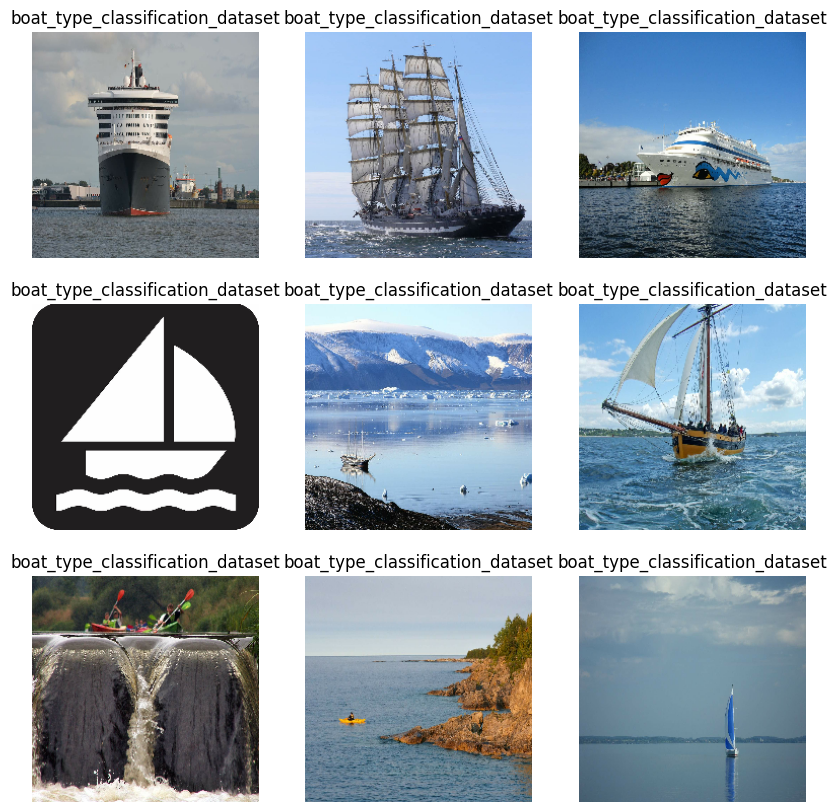

In [22]:
# Inspect class names
class_names = train_ds_raw.class_names
print("Class names:", class_names)

# Show some images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")


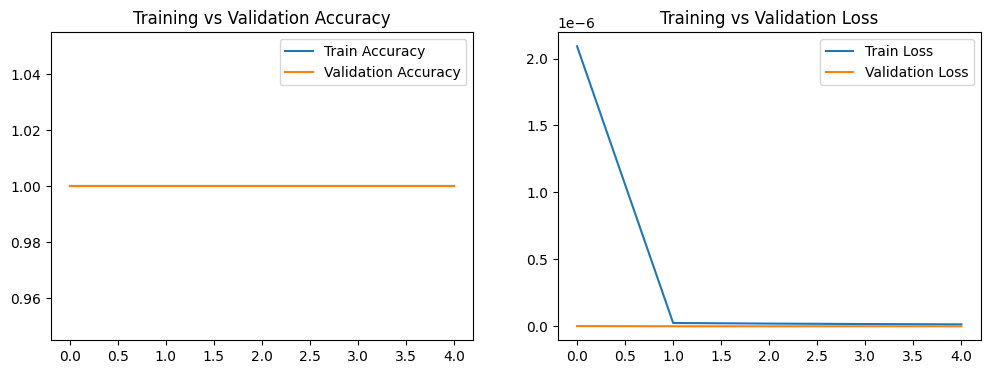

In [23]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create x-axis range
epochs_range = range(len(acc))

# Plot accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


In [24]:
test_loss, test_accuracy = model.evaluate(val_ds)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 1.0000 - loss: 5.6654e-10
Test Loss: 0.0000
Test Accuracy: 1.0000
